Columns with >5% missing:
 Comments    100.0
dtype: float64
Outliers per column:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_17456\1604439796.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\pc\Desktop\10 Academy\setup-task\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\pc\Desktop\10 Academy\setup-task\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


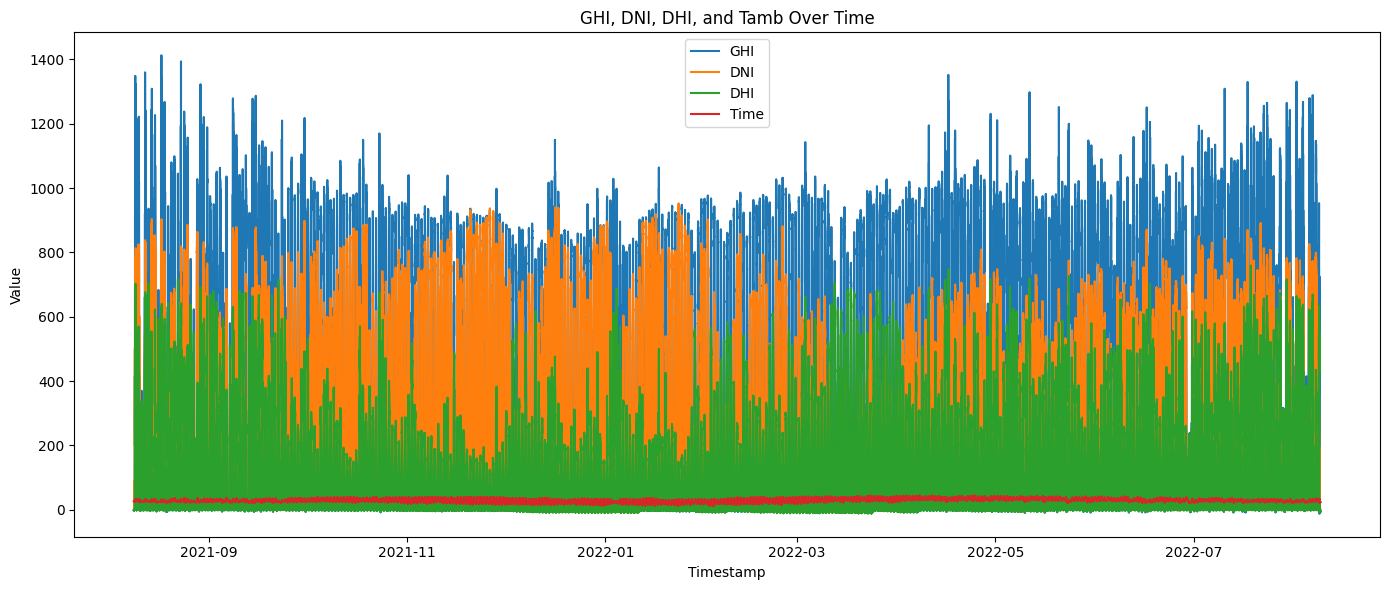

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import os
import matplotlib.pyplot as plt
import seaborn as seaborn

# Load data
df = pd.read_csv(r"C:\Users\pc\Desktop\10 Academy\Week 0\Technical Content\data\benin-malanville.csv")

# Missing Value Report
null_percent = df.isna().mean() * 100
cols_over_5pct = null_percent[null_percent > 5]
print("Columns with >5% missing:\n", cols_over_5pct)

# Key columns to clean/analyze
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
available_columns = [col for col in key_columns if col in df.columns]

# Impute missing values with median first
df[available_columns] = df[available_columns].fillna(df[available_columns].median())

# Compute Z-scores and remove outliers
z_scores = df[available_columns].apply(zscore)
outliers = (z_scores.abs() > 3)
print("Outliers per column:\n", outliers.sum())

# Create cleaned dataframe without outliers
df_cleaned = df[~(outliers.any(axis=1))].copy()

# Ensure 'data/' directory exists
os.makedirs("data", exist_ok=True)

# Ignore data/ folder in git
!echo "data/" >> .gitignore

# Export cleaned data
df_cleaned.to_csv("data/benin_clean.csv", index=False)

# Convert 'Timestamp' to date-time format

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

 #Plot each variable vs. time

plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Time')

# lbels and legend

plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("GHI, DNI, DHI, and Tamb Over Time")
plt.legend(loc='upper right')
plt.tight_layout()


